# **DOĞRUSAL REGRESTON MODELLERİ**
* BASİT DOĞRUSAL REGRESYON
* ÇOKLU DOĞRUSAL REGRESYON
* RİDGE REGRESYON
* LASSO REGRESYON
* ELASTİC NET REGRESYONU

## **BASİT DOĞRUSAL REGRESYON**

In [1]:
# adversiting verileri internet ortamından alınmıştır.

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("Adversiting.csv")
df = df.iloc[:, 1:len(df)]  # verilerin index yapısı değişken olarak alınmış düzeltme yapıldı.

* **YAPILACAK OLAN İŞLEM TV REKLAMLARINA VERİLEN DEĞER İLE SATIŞLARDAKİ ARTMAYI BASİT REGRESYON YÖNTEMİ KULLANARAK MAKİNE MODELİ OLUŞTURULMASI.**

In [98]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


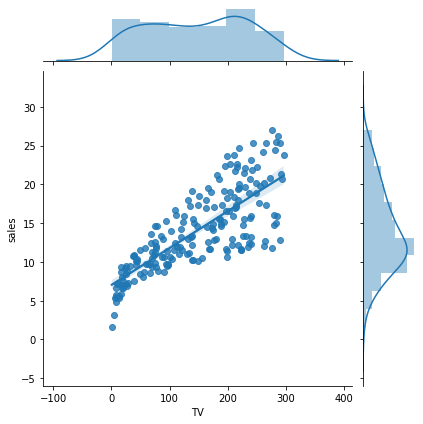

In [36]:
import seaborn as sns
sns.jointplot(x= "TV", y = "sales",data= df, kind = "reg");
# seaborn kutuphanesinden jointplot x ekseni tv bilgileri y ekseni satış bilgileri data=df dataframe'inden ,regresyon modeli
#ile bir grafik oluşturuldu 

In [23]:
from sklearn.linear_model import LinearRegression  #lineer regresyon :model oluşturmak için kullanılan kutuphane

In [93]:
reg = LinearRegression() #DÖNÜŞTÜRÜCÜ

In [25]:
X = df[["TV"]]  #bağımsız değişken
y = df[["sales"]] #bağımlı değişken

In [26]:
model = reg.fit(X, y) #modelleme fonksiyonu oluşturuldu. artık bu model fonksiyonu kullanarak tahmin yapılabilir.

In [28]:
dir(model)  #model nesnesinden alınabilinecek bilgiler.
#b0 katsayısı için intercept_
#b1 katsayısı için coef_
#r2 katsayısı için score ; bağımlı değişkenin değişimin, bağımsız değişkenlerce açıklanma yüzdesi

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [34]:
b0 = model.intercept_
b1 = model.coef_
rkare = model.score(X, y) #bağımsız değişkenleri kullanıldığında bağımlı değişkendeki değişimin yüzde kaçını açıklar

* **Şuana kadar modellemi işlemi yapıldı. Şuandan sonra tahmin işlemi yapılabilir.** 
* **Model demek fonksiyonu bulmak, tahmin ise model ile bulunan fonksiyonu kullanarak tahmin işlemi yapılması.**

(0, 28.278798647831138)

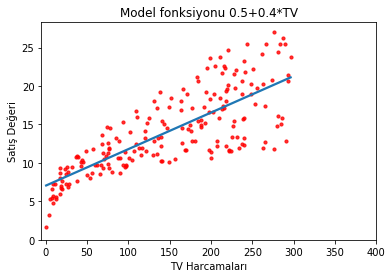

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
grafik = sns.regplot( df["TV"], df["sales"], ci=None, scatter_kws={"color": "r", "s":10})
#seaborn kütüphanesi regplot df["TV"] = x , df["sales"] = y, ci=None bağlılık yok, scatter_kws={color x rengi y rengi gercek değerlerin yarı çapı}
grafik.set_title("Model fonksiyonu 0.5+0.4*TV") #grafik bağlıgı
grafik.set_xlabel("TV Harcamaları") #x eksenın isimlendirme
grafik.set_ylabel("Satış Değeri") # y ekseninin isimlendirme
plt.xlim(-5,400)  #x eksenının değer aralığı
plt.ylim(0)      #y eksenın değer aralığı 

* **Yukarıdaki Grafikte gerçek değerler(kırmızı) ve modellenen fonksiyonun (linear regression için yani basit doğrusal regresyon) doğrusal olarak (mavi) görülmektedir.**

### TAHMİN
* Tahmin el ile de yapılabilir yada predicy(["değer]) olarakta tahmin sonucu alınabilir. 

In [95]:
#el ile yapılması
model.intercept_ + model.coef_*165  # b0 + x*b1 tahmin denklemi

array([[14.87613922]])

In [96]:
#predict fonksiyonu ile
model.predict([[165]]) 

array([[14.87613922]])

* ** TV harcamalarına 165 birim harcandığında satışlardaki sonuç tahmin edilmiştir 14,87 birim satış olacağı tahmin edilmiştir.**
* **Model fonksiyonu ile verilerde bulunmayan bir harcama girildiğinde alınacak satış miktarı tahmin edilebilir. Görüldüğü üzere TV harcamaları en fazla 0-300 arasındadır. TV harcamaları 800 birim harcandığında alınacak satış miktarı tahmin edilebilir.**

In [76]:
model.predict([[800]])

array([[45.0619059]])

In [77]:
# istenirse birden fazla TV harcamasıda girilip toplu şekilde değer alınabilir.

In [90]:
tv_harcamalari= [[50], [800], [150]]

In [92]:
model.predict(tv_harcamalari)

array([[ 9.40942557],
       [45.0619059 ],
       [14.16308961]])